In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import itertools
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

In [120]:
df = pd.read_csv('data_bearings_classification.csv')

In [121]:
df.head()

,bearing_id,a1_x_mean,a1_y_mean,a1_z_mean,a2_x_mean,a2_y_mean,a2_z_mean,rpm_mean,hz_mean,w_mean,...,a1_z_fft_min,a2_x_fft_min,a2_y_fft_min,a2_z_fft_min,a1_x_fft_max,a1_y_fft_max,a1_z_fft_max,a2_x_fft_max,a2_y_fft_max,a2_z_fft_max
0,1,-0.176971,-0.001740,-0.035361,0.114590,0.023329,0.250710,1082.423656,18.040394,0.419961,...,0.023685,0.000016,0.023685,0.017670,21.134667,17.036431,18.972754,20.010540,18.972754,17.036431
1,2,-0.174032,-0.007636,-0.053353,-0.178986,0.024936,0.194061,1074.981634,17.916361,0.501160,...,0.022470,0.000020,0.022470,0.013191,22.177219,17.707234,15.252773,21.194466,15.252773,17.707234
2,3,-0.172328,-0.002343,-0.039898,-0.121842,0.036149,0.183881,1149.927038,19.165451,0.513051,...,0.011786,0.000023,0.011786,0.020196,22.810187,18.881881,16.024957,22.860777,16.024957,18.881881
3,4,-0.149644,-0.000549,-0.037679,-0.119574,0.030838,0.200699,1127.538630,18.792311,0.539426,...,0.002662,0.000009,0.002662,0.020126,20.557838,15.777804,16.857276,19.053852,16.857276,15.777804
4,5,-0.146438,0.015268,-0.026678,-0.080799,0.034042,0.206547,1037.216452,17.286941,0.353715,...,0.013869,0.000114,0.013869,0.020964,25.201937,18.334126,16.483506,22.290534,16.483506,18.334126


In [87]:
df.columns

Index(['bearing_id', 'a1_x_mean', 'a1_y_mean', 'a1_z_mean', 'a2_x_mean',
       'a2_y_mean', 'a2_z_mean', 'rpm_mean', 'hz_mean', 'w_mean', 'status',
       'a1_x_range', 'a1_y_range', 'a1_z_range', 'a2_x_range', 'a2_y_range',
       'a2_z_range', 'w_range', 'a1_x_min', 'a1_y_min', 'a1_z_min', 'a2_x_min',
       'a2_y_min', 'a2_z_min', 'a1_x_max', 'a1_y_max', 'a1_z_max', 'a2_x_max',
       'a2_y_max', 'a2_z_max', 'w_max', 'a1_x_fft_mean', 'a1_y_fft_mean',
       'a1_z_fft_mean', 'a2_x_fft_mean', 'a2_y_fft_mean', 'a2_z_fft_mean',
       'a1_x_ff_range', 'a1_y_fft_range', 'a1_z_fft_range', 'a2_x_fft_range',
       'a2_y_fft_range', 'a2_z_fft_range', 'a1_x_fft_min', 'a1_y_fft_min',
       'a1_z_fft_min', 'a2_x_fft_min', 'a2_y_fft_min', 'a2_z_fft_min',
       'a1_x_fft_max', 'a1_y_fft_max', 'a1_z_fft_max', 'a2_x_fft_max',
       'a2_y_fft_max', 'a2_z_fft_max'],
      dtype='object')

In [88]:
# check number of invalid metric entries
class cleaning_data():
    def __init__():
        pass

    def drop_duplicates(self,data):
        return data.drop_duplicates()
    
    def remove_space(self,data):
        return data.replace('^ | $', '', regex=True)
    
    def remove_empty_rows(self,data):
        return data.dropna(how='all')

In [89]:
df.shape

(111, 55)

In [90]:
#remove the good bearings
df=df[df["status"]==0]
df.shape

(99, 55)

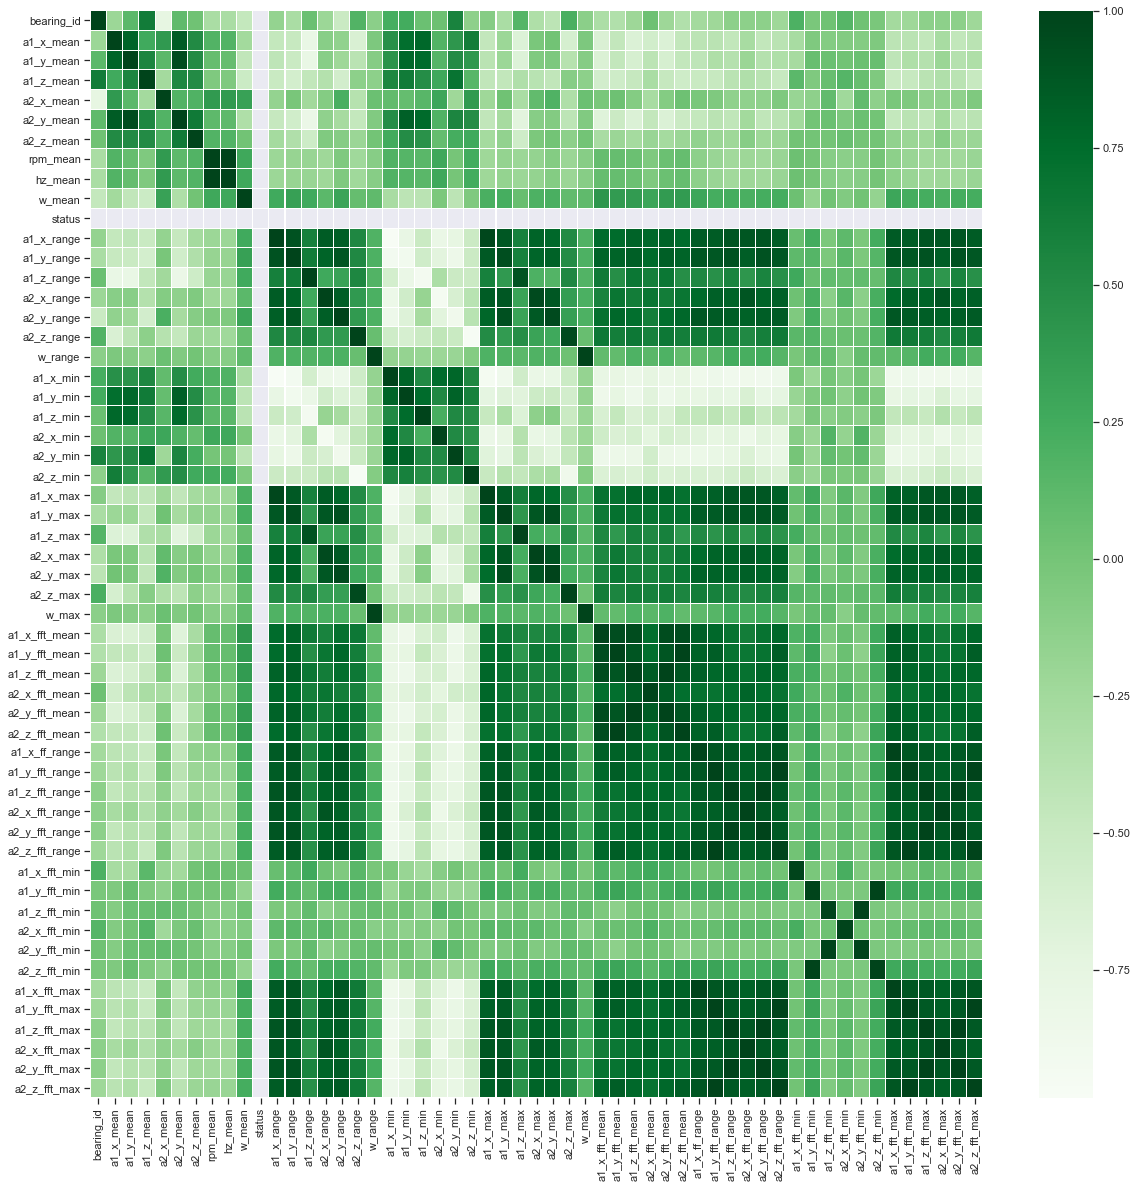

In [49]:
#plot a heatmap to find highly correlated features 
fig,ax = plt.subplots(figsize=(20, 20))
headmap_plot = sns.heatmap(df.corr(), ax=ax, annot=False, linewidths=0.05, fmt= '.2f',cmap="Greens")
sns.set(rc={"xtick.bottom" : True, "ytick.left" : True})
plt.show()

In [129]:
# #to apply some clustering techniques on a heatmap
# # Prepare a vector of color mapped to the 'hz_mean' column
# df = df.set_index('bearing_id')

# my_palette = dict(zip(df.hz_mean.unique(), ["orange","yellow","brown"]))
# row_colors = df.hz_mean.map(my_palette)
# sns.clustermap(df, metric="correlation", method="single", cmap="Blues", standard_scale=1, row_colors=row_colors)
# plt.show()

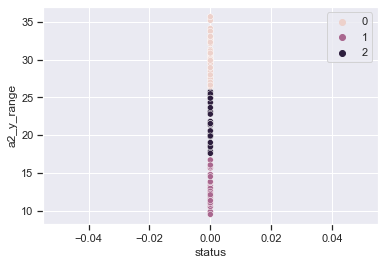

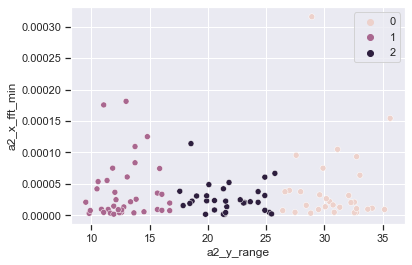

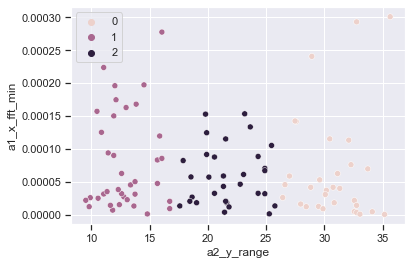

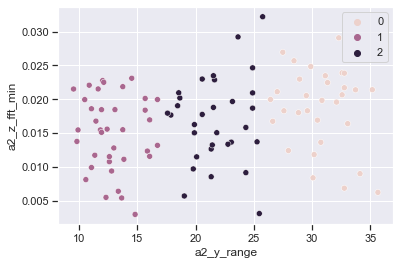

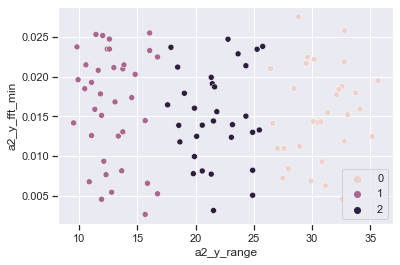

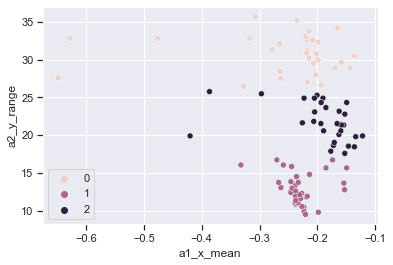

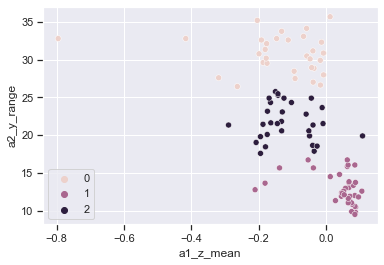

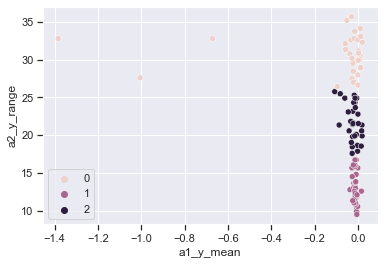

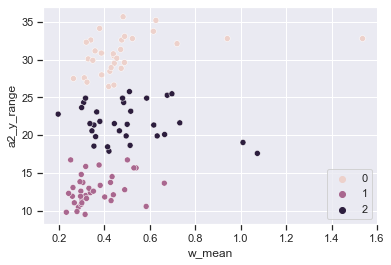

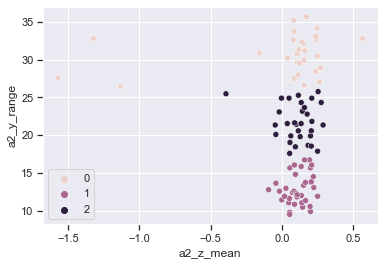

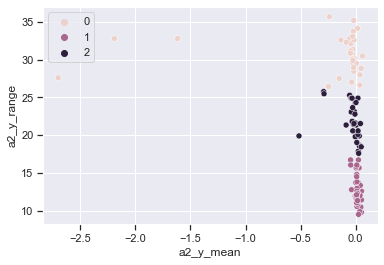

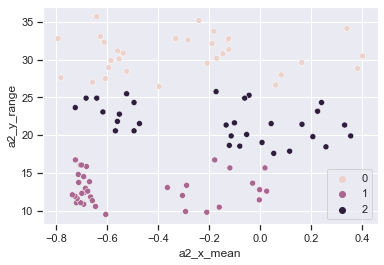

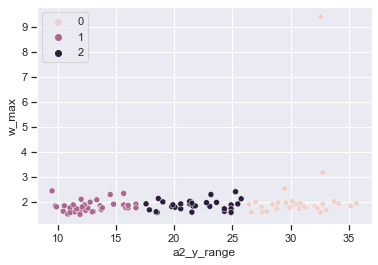

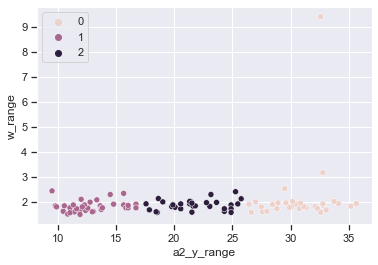

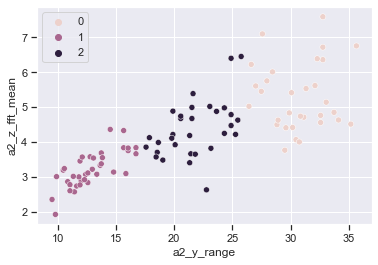

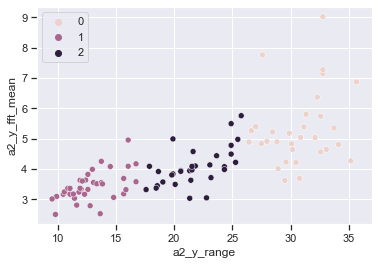

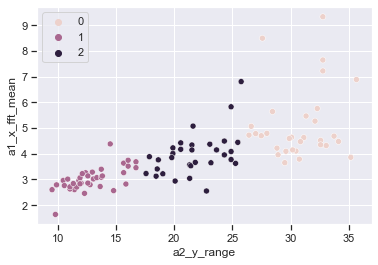

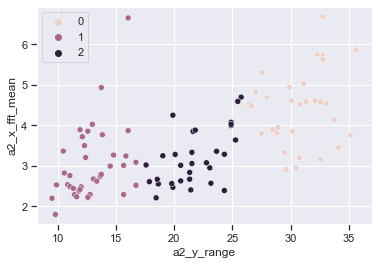

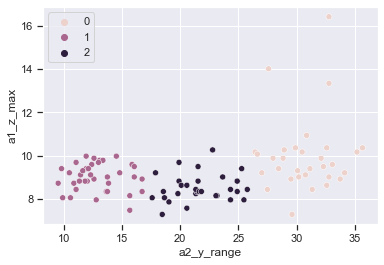

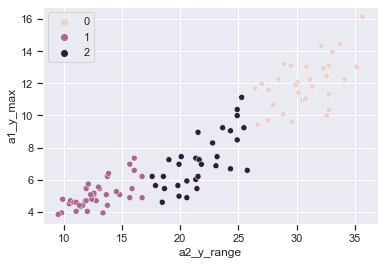

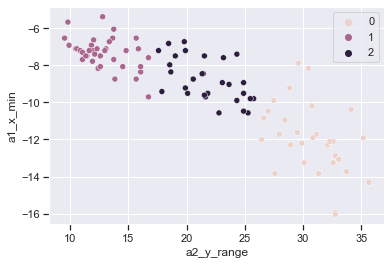

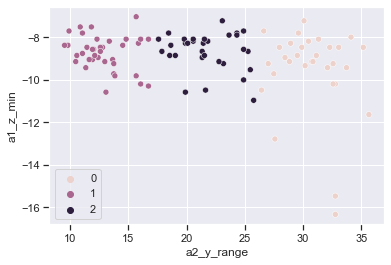

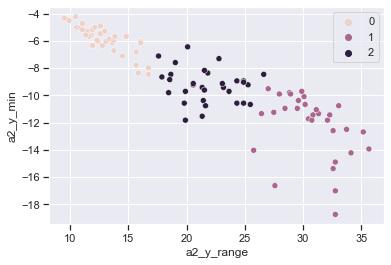

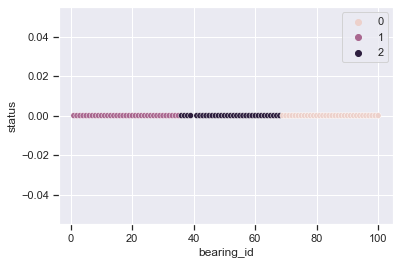

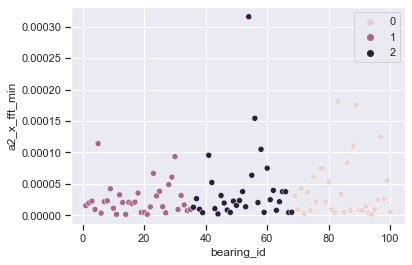

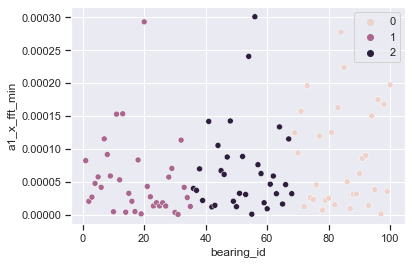

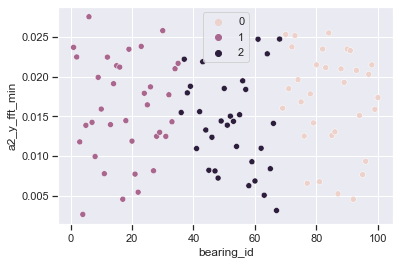

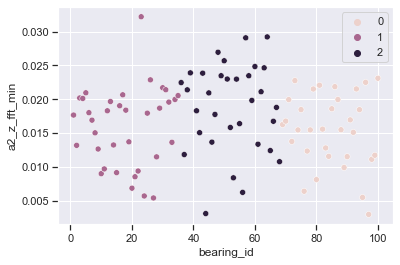

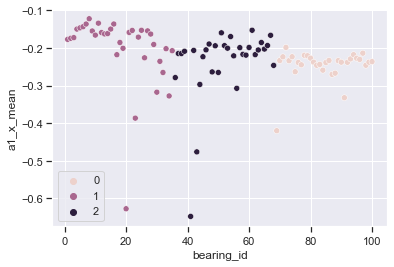

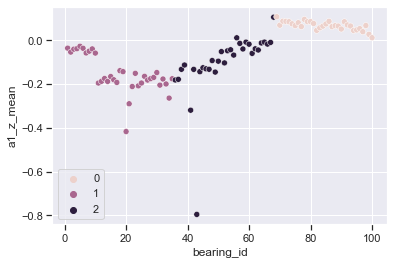

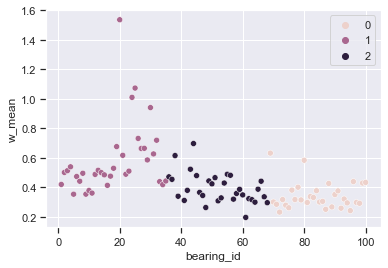

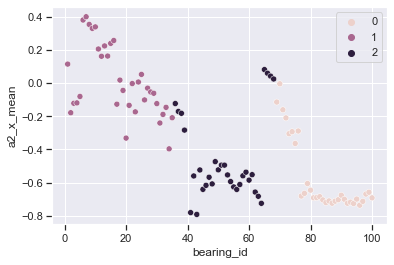

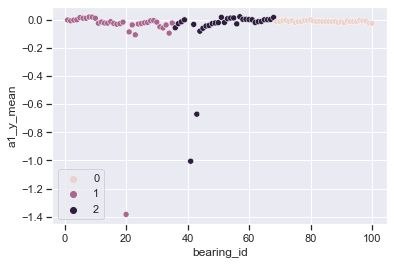

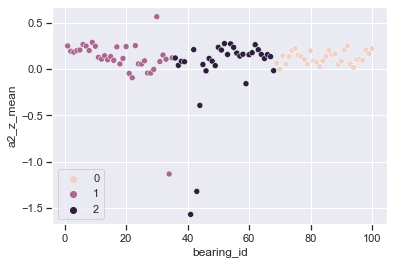

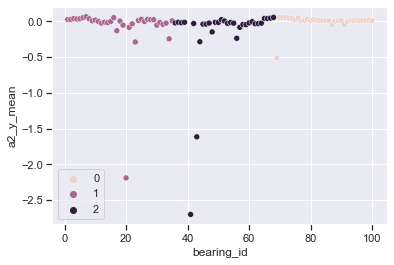

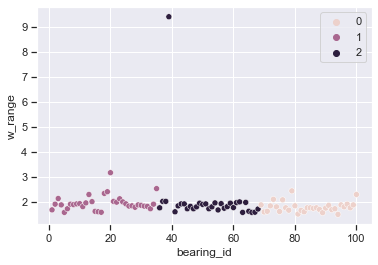

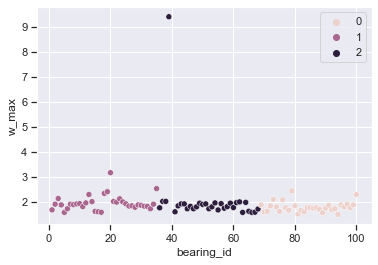

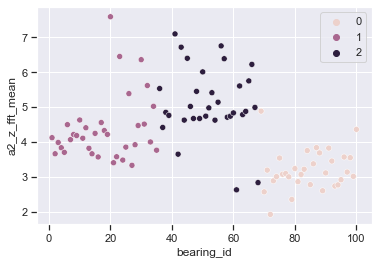

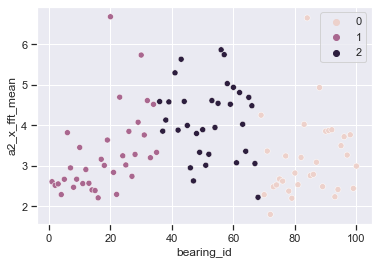

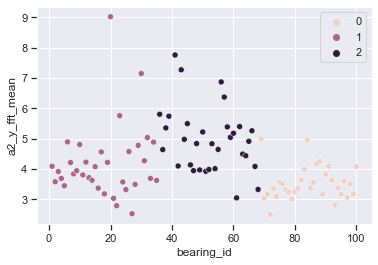

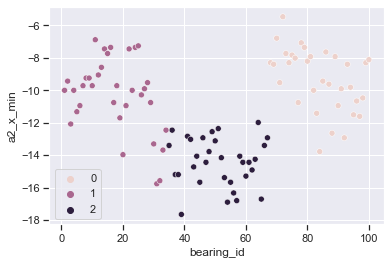

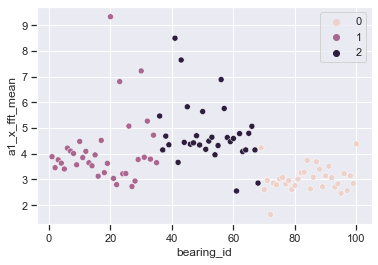

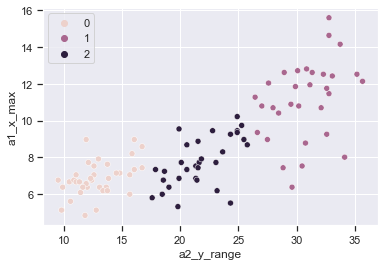

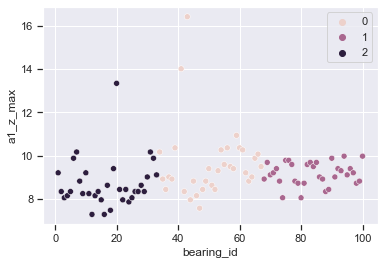

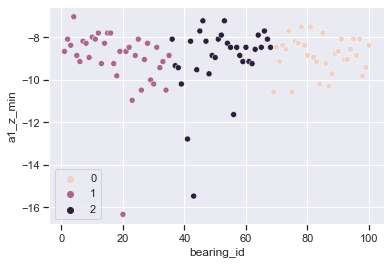

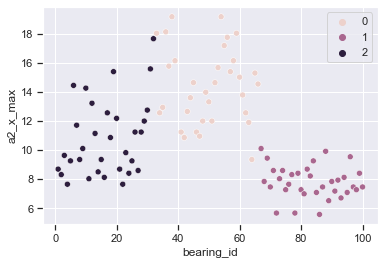

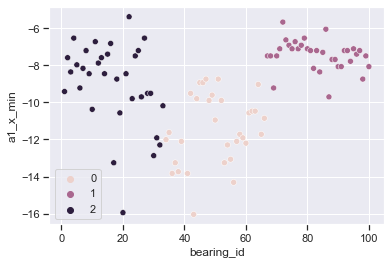

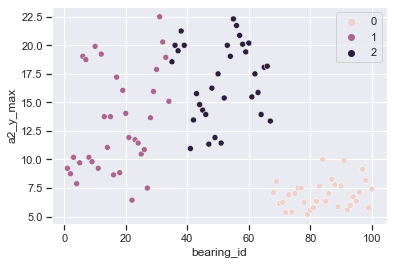

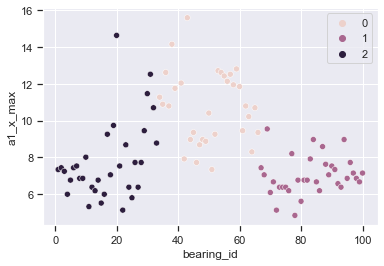

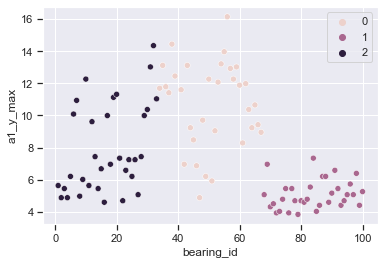

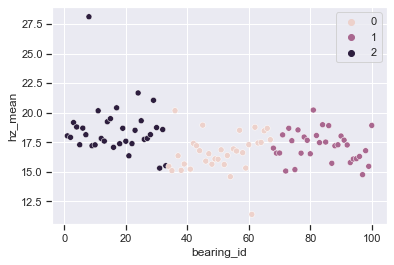

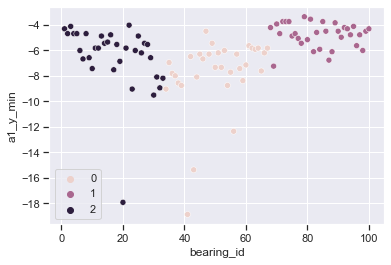

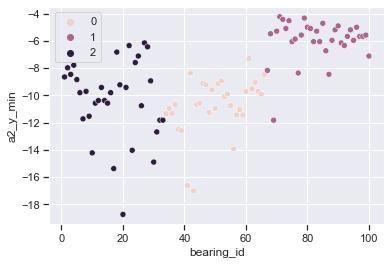

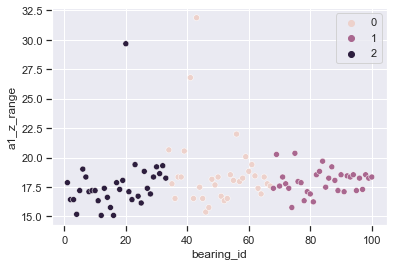

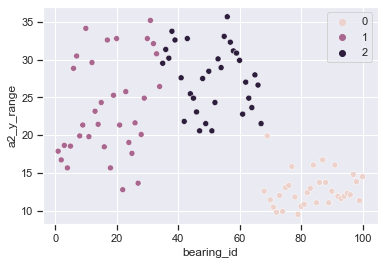

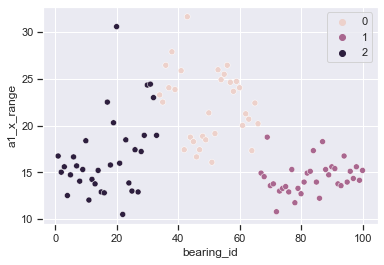

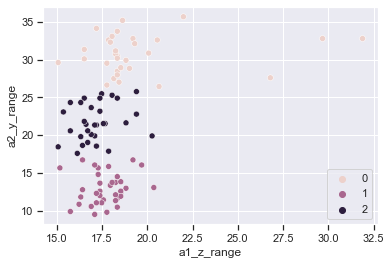

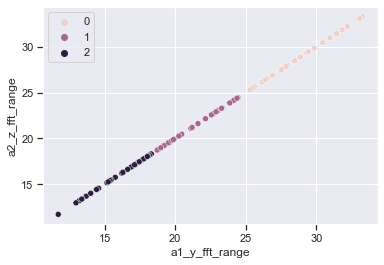

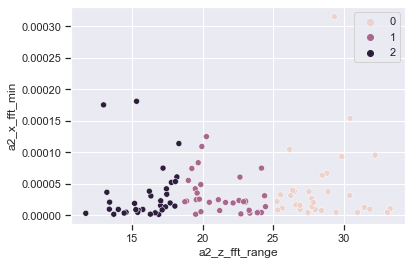

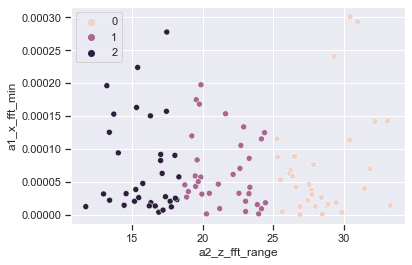

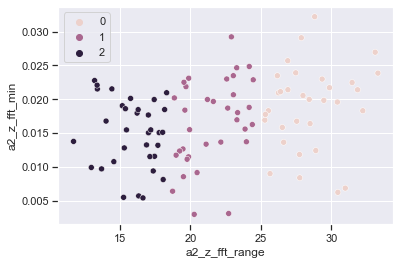

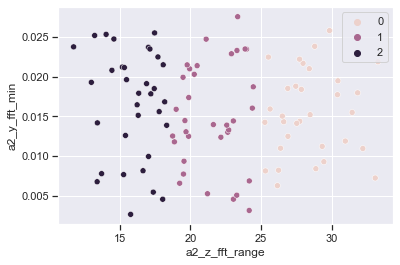

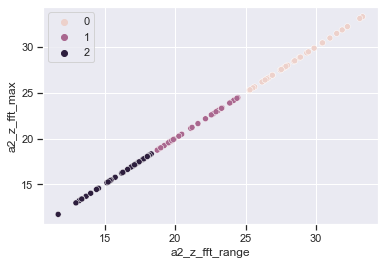

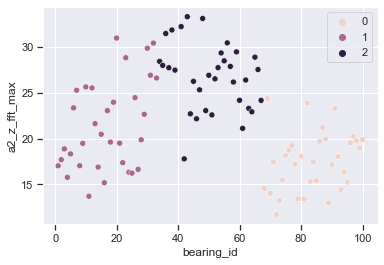

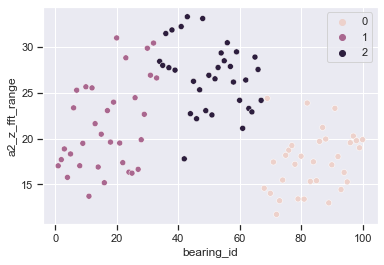

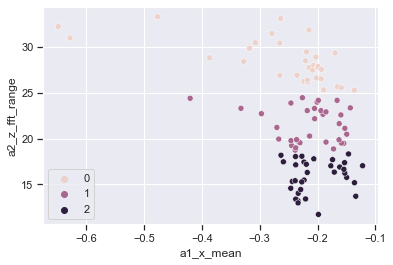

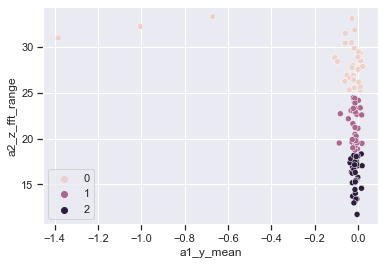

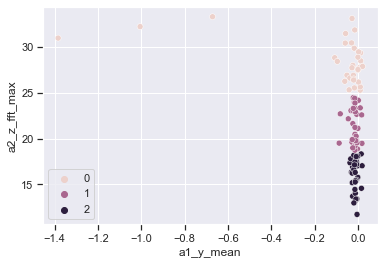

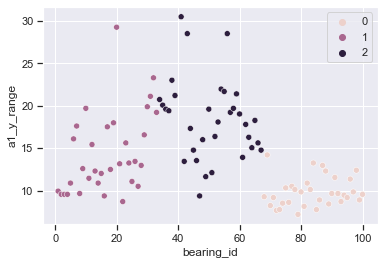

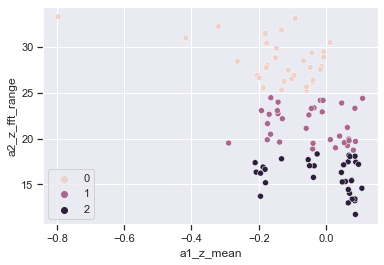

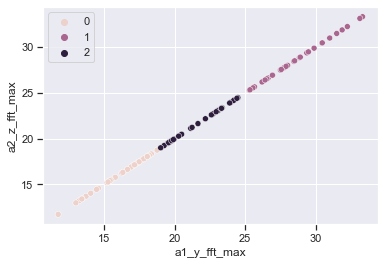

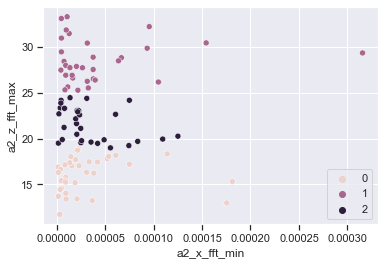

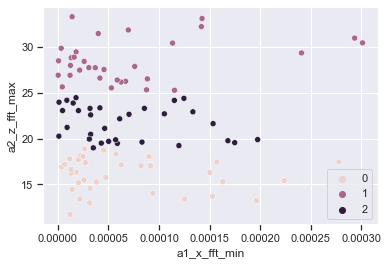

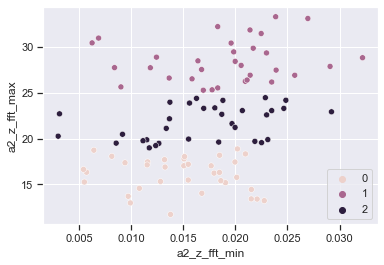

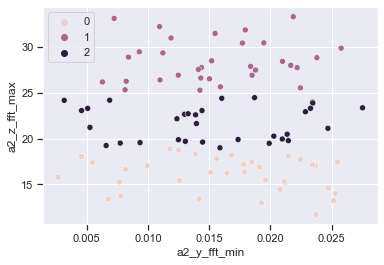

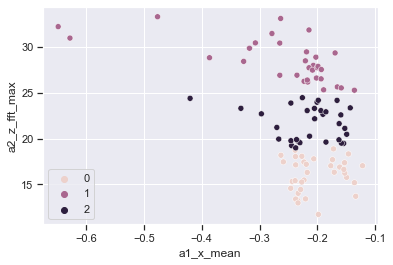

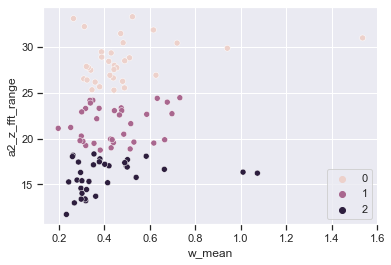

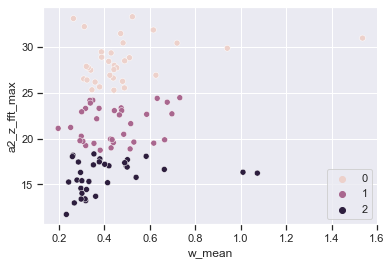

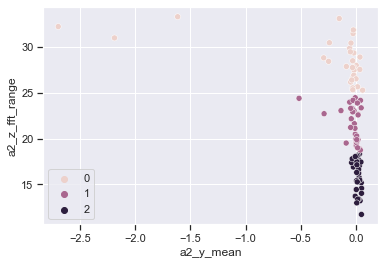

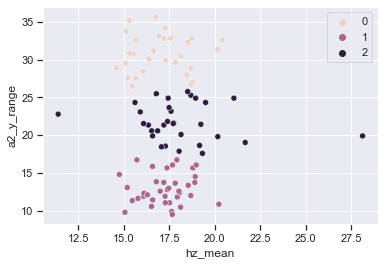

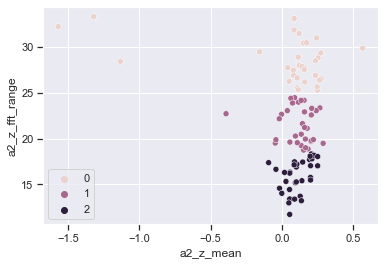

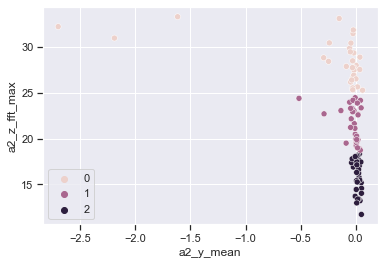

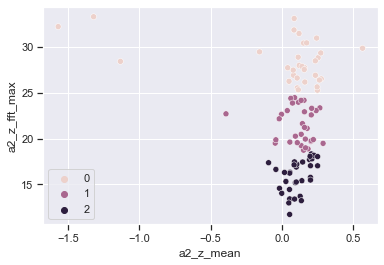

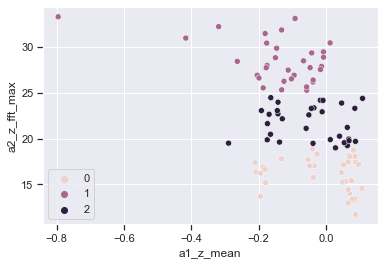

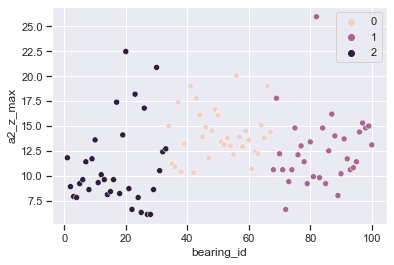

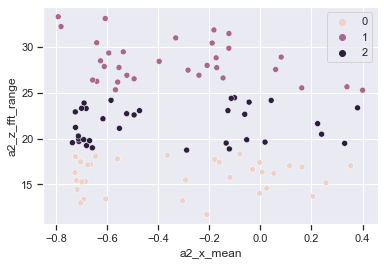

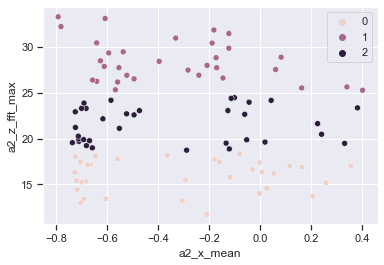

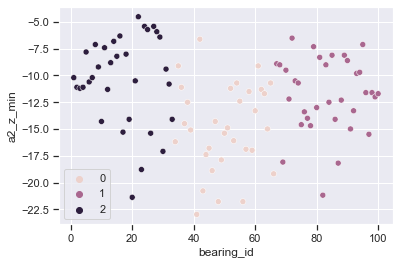

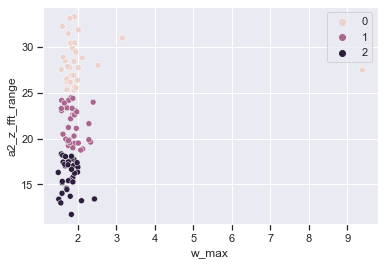

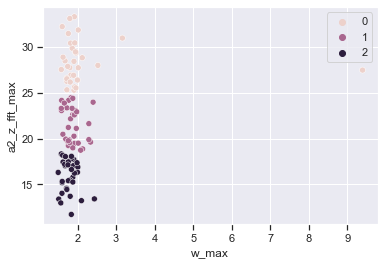

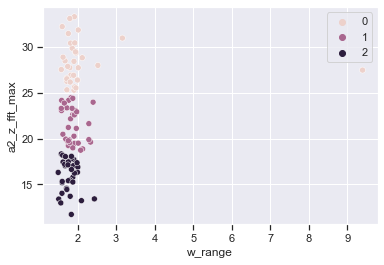

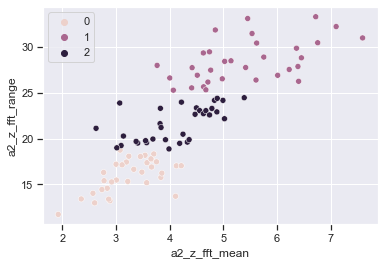

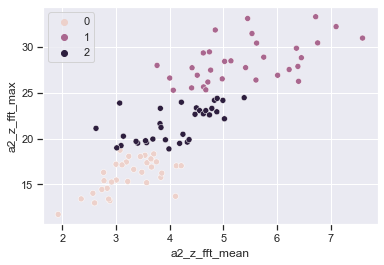

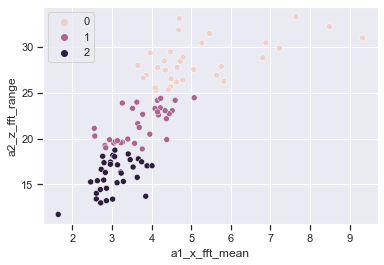

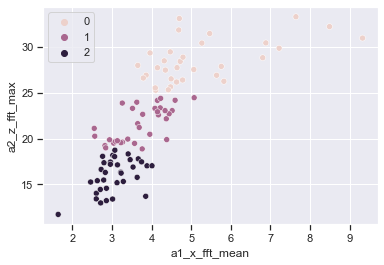

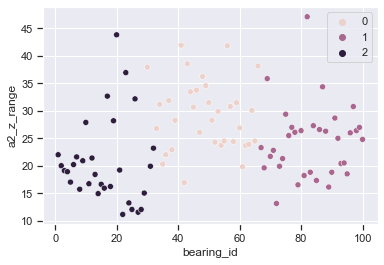

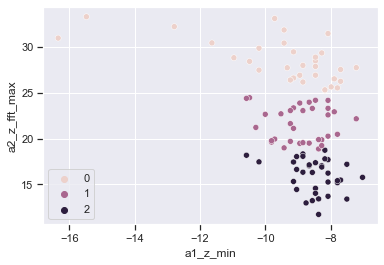

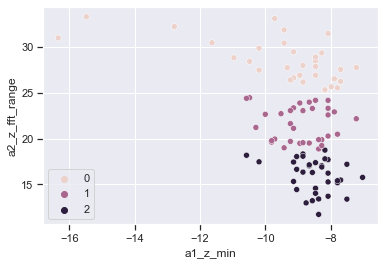

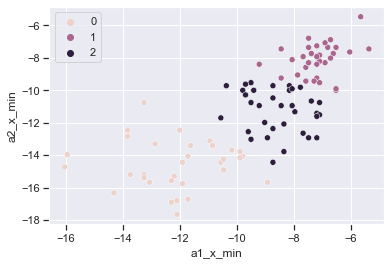

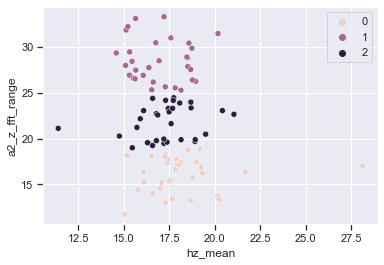

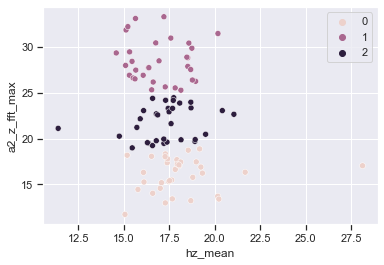

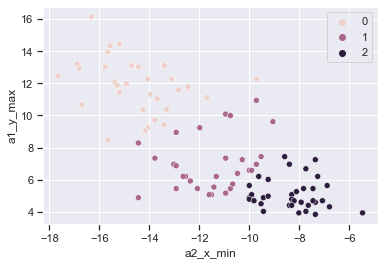

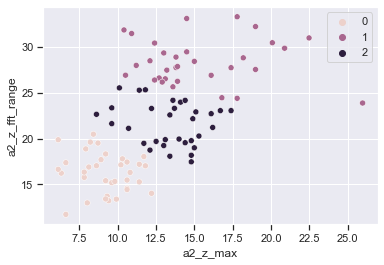

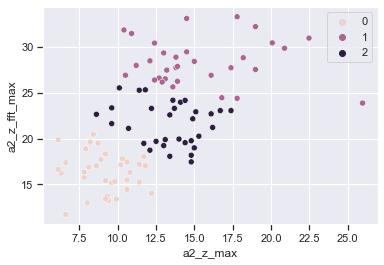

In [100]:
#Selecting the features using Silhoutte scores: 
#find all the
def score_combination(df):
    combinations = list(itertools.combinations(df.columns, 2))

    score_dict = dict()
    for feature1,feature2 in combinations:
        X = df[[feature1, feature2]]
        for number_of_clusters in range(2,5):
            km = KMeans(random_state=42,n_clusters=number_of_clusters)
            km.fit(X)
            sil_score= silhouette_score(X, km.labels_)
            score_dict[sil_score] = (feature1, feature2, number_of_clusters)
    score_dict_keys = list(score_dict.keys())
    score_dict_keys = sorted(score_dict_keys,reverse=True)
    return score_dict,score_dict_keys

def select_plot_score(df,min_cluster,min_by_cluster,score_dict,score_dict_keys):
    features_list = []
    
    for key in score_dict_keys:
        nr_clusters = score_dict[key][2]
        if nr_clusters >= min_cluster:
            feature1 = score_dict[key][0]
            feature2 = score_dict[key][1]
            features_list.append(feature1)
            features_list.append(feature2)
            km = KMeans(random_state=42, n_clusters=nr_clusters)
            X = df[[feature1,feature2]]
            km.fit(X)
            values,counts = np.unique(km.labels_, return_counts=True)
            if sorted(counts)[0]>min_by_cluster:
                sns.scatterplot(data=df, x=feature1, y=feature2, hue=km.labels_)
                plt.show()

score_dict,score_dict_keys = score_combination(df)

select_plot_score(df,3,30,score_dict,score_dict_keys)

In [ ]:
sns.pairplot(df)

In [ ]:
#create a new data frame with only the required features 

In [60]:
#find the right number of Ks using the elbow method 

In [59]:
#calculate Kmeans
#For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre.
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\Heba\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


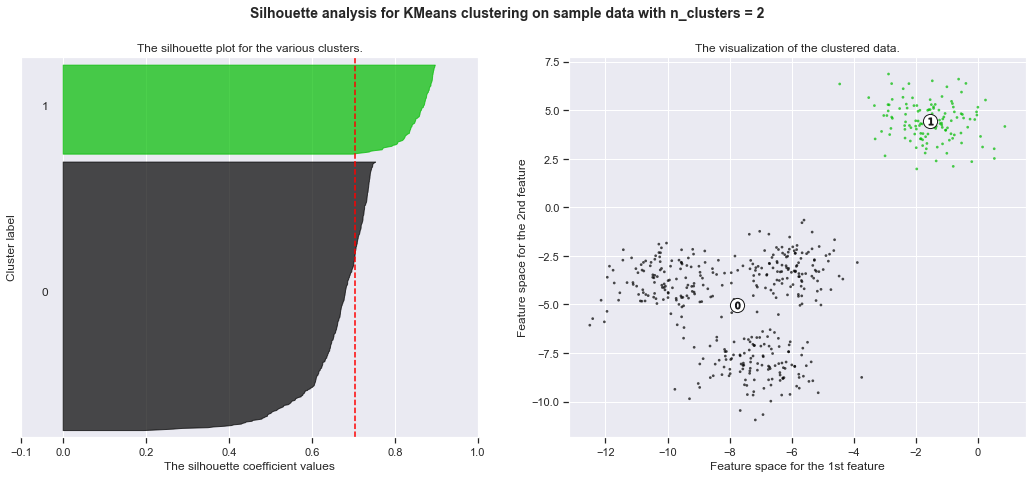

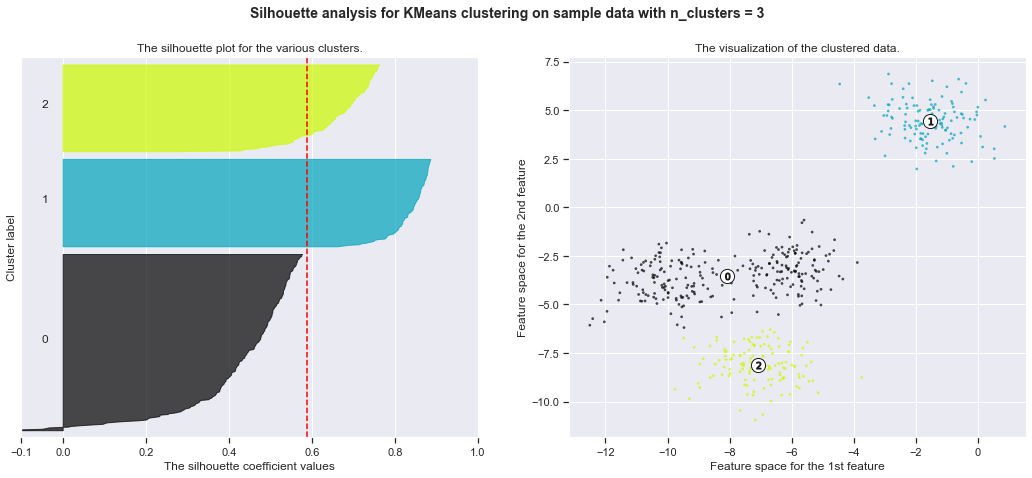

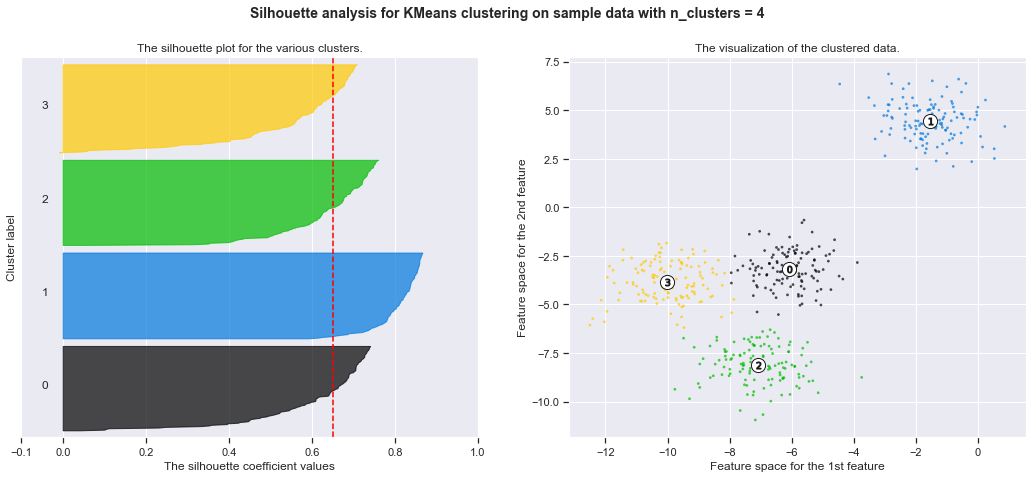

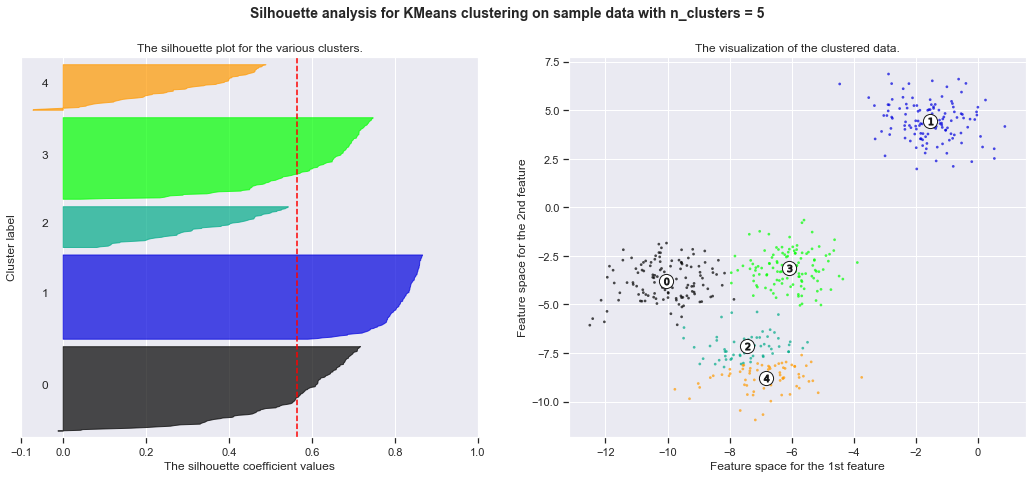

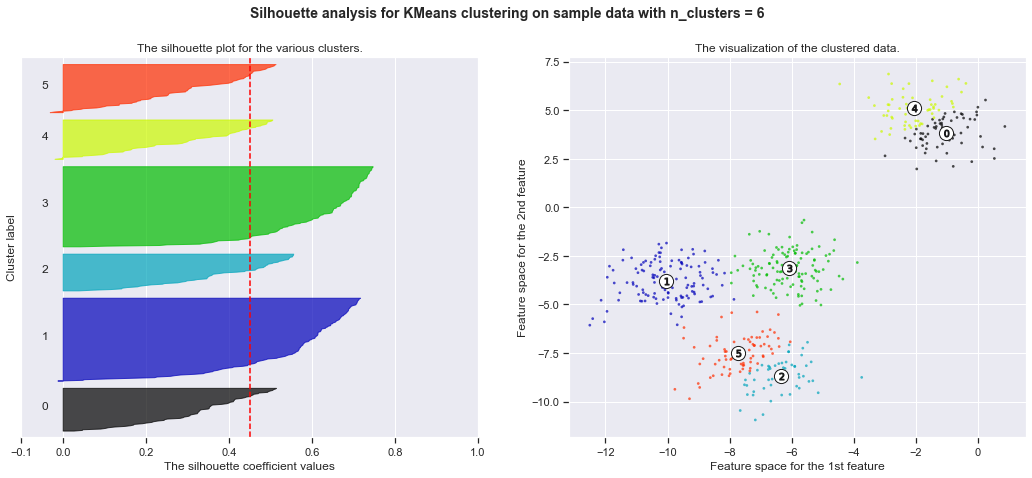

In [61]:
#Visulaize (Evaluation for test scores)
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()